In [4]:
import math as mt
import numpy as np
from matplotlib import pyplot as py
%matplotlib inline

In [5]:
# function for creating flow grid
def flowgrid (xstart, xend, ystart, yend, N):
    x = np.linspace(xstart,xend,N)
    y = np.linspace(ystart,yend,N)
    X,Y = np.meshgrid(x,y)
    return X,Y

In [6]:
# Defining grid of flow
N = 200
xstart, xend, ystart, yend = -4.0,4.0,-2.0,2.0
X,Y = flowgrid(xstart,xend,ystart,yend,N)

In [7]:
def get_vel_doublet (k,xd,yd,X,Y):
    x = X-xd
    y = Y-yd
    u = -k/(2*np.pi)*(x**2-y**2)/((x**2 + y**2)**2)
    v = -k/(2*np.pi)*(2*x*y)/((x**2 + y**2)**2)
    return u,v

def get_psi_doublet (k,xd,yd,X,Y):
    x = X-xd
    y = Y-yd
    psi = -k/(2*np.pi)*y/((x**2 + y**2)**2)
    return psi

In [8]:
# getting velocities and stream function
k = 1.0
xdoublet,ydoublet = 0.0, 0.0
u_doublet,v_doublet = get_vel_doublet (k,xdoublet,ydoublet,X,Y)
psi_doublet = get_psi_doublet (k,xdoublet,ydoublet,X,Y)

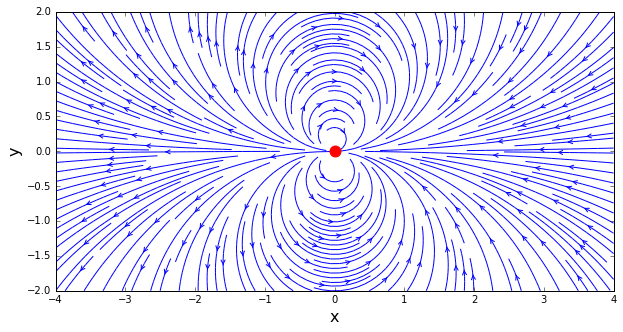

In [10]:
#plot the doublet
size = 10
py.figure(figsize = (size, (yend-ystart)/(xend-xstart)*size))
py.xlabel('x',fontsize = 16)
py.ylabel('y',fontsize = 16)
py.xlim(xstart,xend)
py.ylim(ystart,yend)
py.streamplot(X,Y,u_doublet,v_doublet, density =2, arrowsize = 1, linewidth = 1, arrowstyle = '->')
py.scatter(xdoublet,ydoublet,color = 'red', s = 120)

In [11]:
#free stream parameters
u_inf = 1.0
ufree = u_inf * np.ones((N,N),dtype=float)
vfree = np.zeros((N,N),dtype = float)
psi_free = u_inf * Y

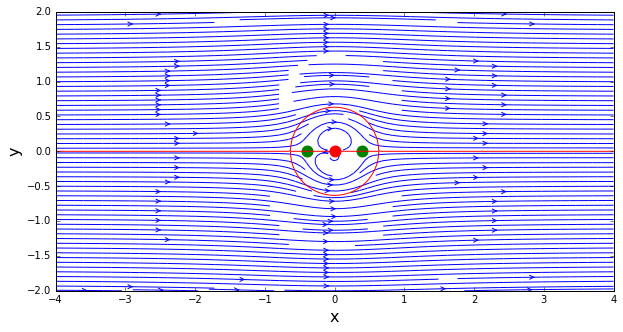

In [14]:
#Doublet in free stream
U1 = ufree + u_doublet
V1 = vfree + v_doublet
psi = psi_free + psi_doublet

#Stagnation Points
xstag1,ystag1 = +np.sqrt(k/(2*np.pi*u_inf)) , 0
xstag2,ystag2 = -np.sqrt(k/(2*np.pi*u_inf)) , 0

py.figure(figsize = (size, (yend-ystart)/(xend-xstart)*size))
py.xlabel('x',fontsize = 16)
py.ylabel('y',fontsize = 16)
py.xlim(xstart,xend)
py.ylim(ystart,yend)
py.streamplot(X,Y,U1,V1, density =2, arrowsize = 1, linewidth = 1, arrowstyle = '->')
py.scatter(xdoublet,ydoublet,color = 'red', s = 120)
py.scatter([xstag1,xstag2],[ystag1,ystag2],color = 'g', s = 120)
py.contour(X,Y,psi, levels = [0.], colors = 'red', linewidth = 2)